<a href="https://colab.research.google.com/github/VadymKalin/GoogleKnowledgeGraph/blob/master/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ID3, C45, CART, CHAID, MARS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = data.drop(columns=['Purchased'])
y = data['Purchased']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_transform = sc.fit_transform(X_train)
X_test_transform = sc.transform(X_test)

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_transform, y_train)


DecisionTreeClassifier(random_state=0)

In [6]:
y_pred_test = tree.predict(X_test_transform)

In [9]:
from sklearn.metrics import accuracy_score, f1_score
accuracy_score(y_test, y_pred_test)

0.9

In [10]:
f1_score(y_test, y_pred_test)

0.8260869565217391

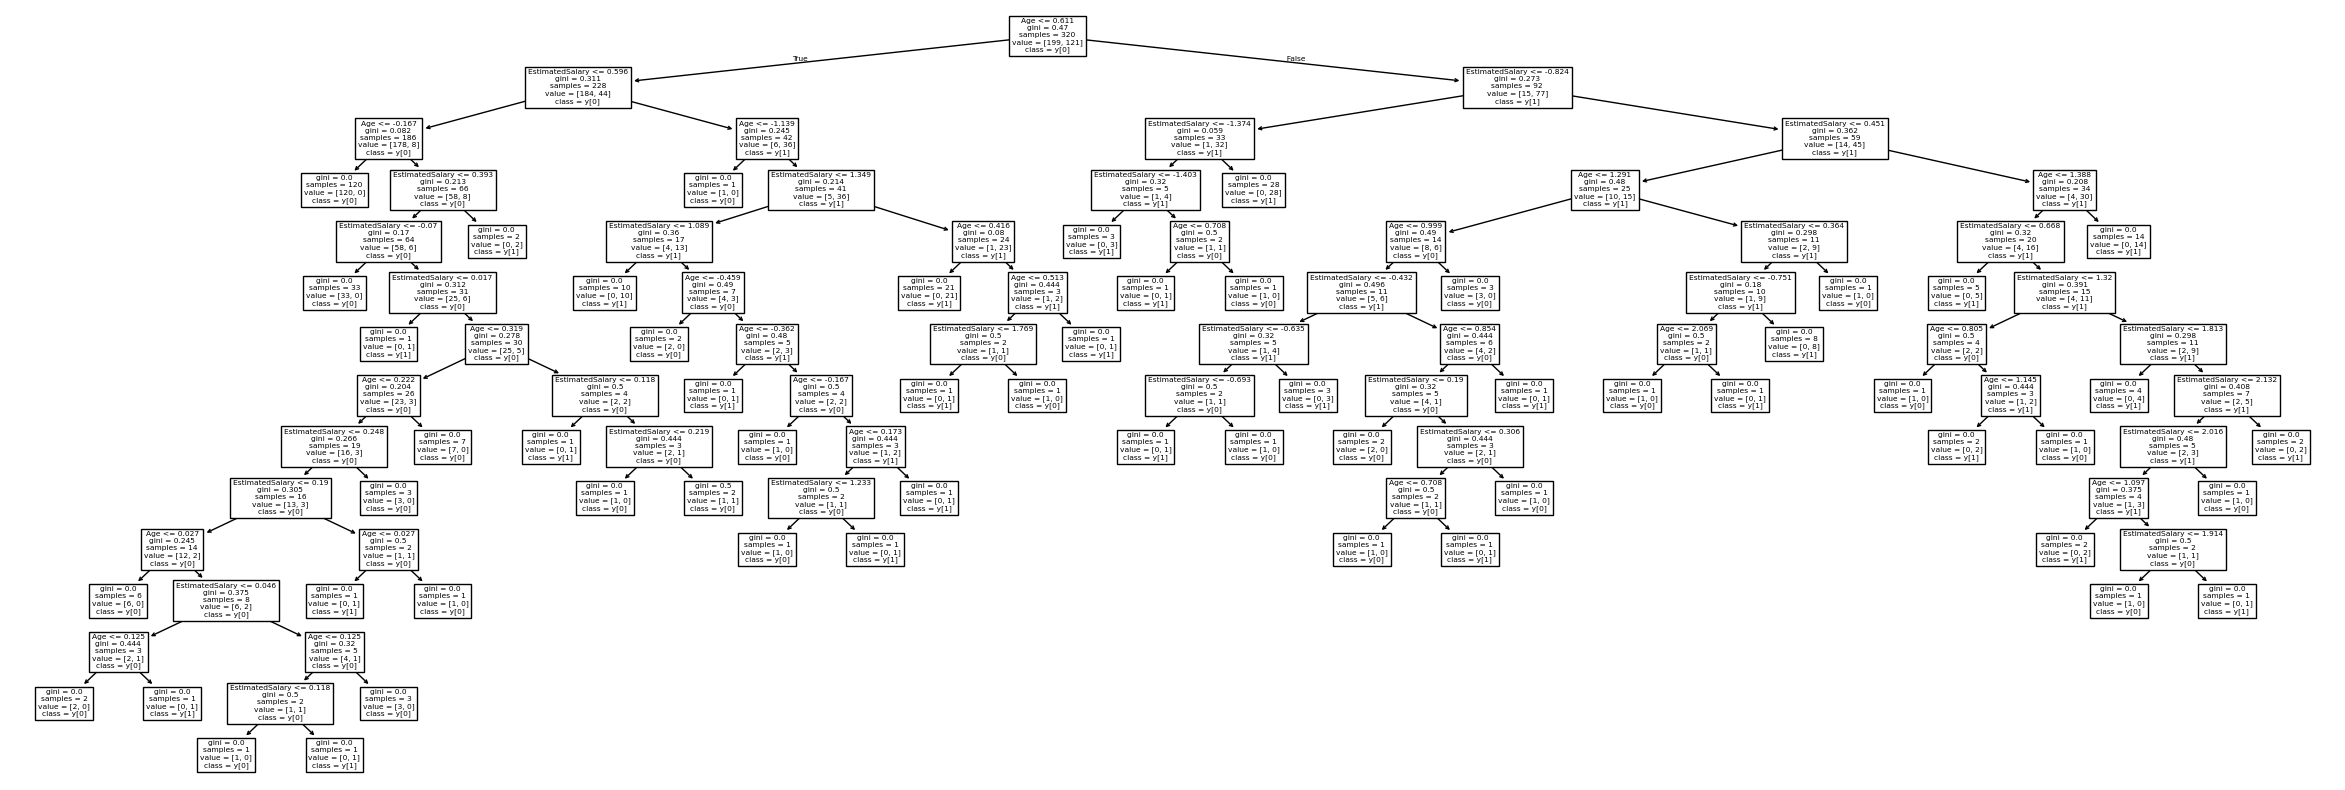

In [13]:
plt.figure(figsize=(30,10))
from sklearn.tree import plot_tree
plot_tree(tree,feature_names=X.columns, class_names=True)
plt.show()


In [14]:
y_pred_test = tree.predict(X_train_transform)
f1_score(y_train, y_pred_test)

0.995850622406639

In [ ]:
# overfit
# parameter for the decision tree

In [16]:
from sklearn.model_selection import KFold
import numpy as np
X = np.random.randint(0, 10, (4,2))
y = np.array([1,2,3,4])
kf = KFold(n_splits=2)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    print(X_train)
    print(X_test)
    y_train, y_test = y[train_index], y[test_index]
    print(y_train)
    print(y_test)

TRAIN: [2 3] TEST: [0 1]
[[4 5]
 [7 9]]
[[0 4]
 [0 3]]
[3 4]
[1 2]
TRAIN: [0 1] TEST: [2 3]
[[0 4]
 [0 3]]
[[4 5]
 [7 9]]
[1 2]
[3 4]
